### Wavelet Peak Detection

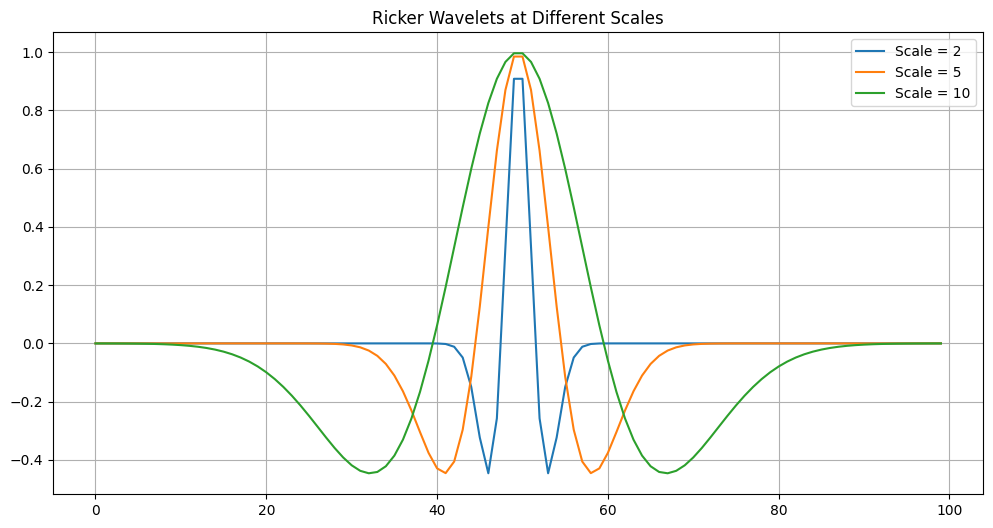

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ricker_wavelet(points, scale):
    """
    Generate a Ricker (Mexican Hat) wavelet
    
    Parameters:
    -----------
    points : int
        Number of points in the wavelet
    scale : float
        Width parameter of the wavelet
        
    Returns:
    --------
    wavelet : array
        The Ricker wavelet
    """
    x = np.arange(points) - (points - 1.0) / 2
    x = x / scale
    wavelet = (1 - x**2) * np.exp(-x**2 / 2)
    return wavelet

# Generate and plot example wavelets at different scales
plt.figure(figsize=(12, 6))
points = 100
for scale in [2, 5, 10]:
    wavelet = ricker_wavelet(points, scale)
    plt.plot(wavelet, label=f'Scale = {scale}')
plt.title('Ricker Wavelets at Different Scales')
plt.legend()
plt.grid(True)
plt.show()

### What is a Continuous Wavelet Transform (CWT)?
The CWT is like trying on different-sized measuring tools to see which ones best match our peaks. Mathematically, we're:

- Taking our wavelet
- Stretching it to different widths (the 'widths' parameter in find_peaks_cwt)
- Sliding it across our signal (convolution)
- Measuring how well it matches at each position



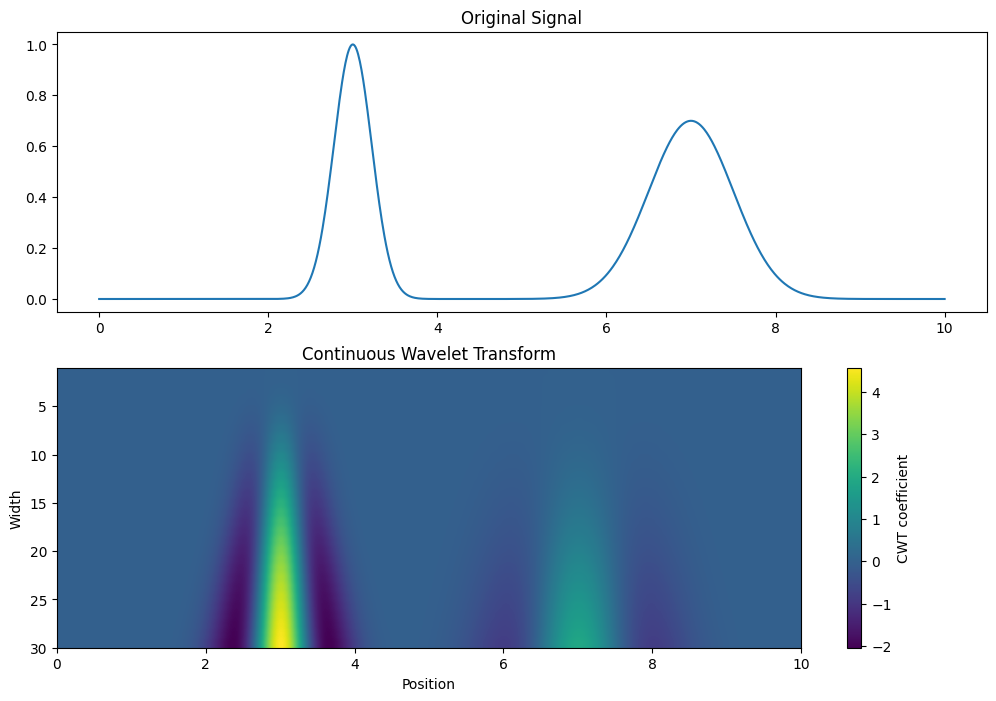

In [2]:
# Example of how CWT works with a simple signal
def create_test_signal():
    """Create a test signal with peaks of different widths"""
    x = np.linspace(0, 10, 1000)
    # Narrow peak
    peak1 = np.exp(-(x-3)**2/0.1)
    # Wide peak
    peak2 = 0.7*np.exp(-(x-7)**2/0.5)
    return x, peak1 + peak2

x, signal = create_test_signal()
from scipy import signal as sig

# Compute CWT at different scales
widths = np.arange(1, 31)
cwt = sig.cwt(signal, sig.ricker, widths)

# Visualize
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(x, signal)
plt.title('Original Signal')
plt.subplot(212)
plt.imshow(cwt, aspect='auto', extent=[x[0], x[-1], widths[-1], widths[0]])
plt.colorbar(label='CWT coefficient')
plt.title('Continuous Wavelet Transform')
plt.ylabel('Width')
plt.xlabel('Position')
plt.show()

In [8]:
def print_frequency_harmonics(frequencies, num_harmonics=3):
    """
    Print the main frequencies and their harmonics up to specified degree.
    
    Parameters:
    -----------
    frequencies : array-like
        List or array of fundamental frequencies
    num_harmonics : int, optional
        Number of harmonics to calculate (default=3)
    
    Returns:
    --------
    dict : Dictionary containing frequencies and their harmonics
    """
    result = {}
    
    for base_freq in frequencies:
        harmonics = [base_freq * (n + 1) for n in range(num_harmonics)]
        result[base_freq] = harmonics
        
        print(f"\nBase Frequency: {base_freq:.2f} Hz")
        print("-" * 30)
        for i, harmonic in enumerate(harmonics):
            if i == 0:
                print(f"Fundamental: {harmonic:.2f} Hz")
            else:
                print(f"{i+1}th Harmonic: {harmonic:.2f} Hz")
    
    return result

# Example usage

test_frequencies = [0.1250, 0.0313, 0.0500]  # Frequencies for Single Question, Question Block, and Resting State



harmonics_dict = print_frequency_harmonics(test_frequencies)



Base Frequency: 0.12 Hz
------------------------------
Fundamental: 0.12 Hz
2th Harmonic: 0.25 Hz
3th Harmonic: 0.38 Hz

Base Frequency: 0.03 Hz
------------------------------
Fundamental: 0.03 Hz
2th Harmonic: 0.06 Hz
3th Harmonic: 0.09 Hz

Base Frequency: 0.05 Hz
------------------------------
Fundamental: 0.05 Hz
2th Harmonic: 0.10 Hz
3th Harmonic: 0.15 Hz
